# Intro
Name:  

    MAP_proposal_profiles

Purpose:  

    Python script for plotting AOD profile and extinctions for various places

Input:

    none at command line
  
Output:

    figures and save files...
  
Keywords:

    none
  
Dependencies:

    - matplotlib
    - mpltools
    - numpy
    - scipy : for saving and reading
    - os
    - datetime
    - mpl_toolkits
    - plotting_utils (user defined plotting routines)
    - map_utils, dependent on geopy
    - Basemap
    - Sp_parameters
    - write_utils (nearest_neighbor)
  
Needed Files:

  - file.rc : for consistent creation of look of matplotlib figures

Modification History:

    Written: Samuel LeBlanc, Santa Cruz, NASA Ames, 2016-06-08

# Import the required modules and do the setup

In [1]:
%config InlineBackend.rc = {}
import matplotlib 
matplotlib.rc_file('C:\\Users\\sleblan2\\Research\\python_codes\\file.rc')
import matplotlib.pyplot as plt
import matplotlib.colors as colors
%matplotlib notebook
from mpltools import color
import numpy as np
import scipy.io as sio
import hdf5storage as hs
import math
import os
import Sp_parameters as Sp

C:\Python27_64\WinPython-64bit-2.7.6.4\python-2.7.6.amd64\lib\site-packages\IPython\kernel\__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [7]:
import load_utils as lu
from load_utils import mat2py_time, toutc

In [16]:
from mpl_toolkits.basemap import Basemap,cm

In [371]:
from Sp_parameters import ext_prof,smooth, binned_statistic

In [377]:
from write_utils import nearest_neighbor

In [3]:
# set the basic directory path
fp='C:\\Users\\sleblan2\\Research\\SEAC4RS\\'

# Load some required files

## Load some matlab files

### Load 4STAR data

In [4]:
star = sio.loadmat(fp+'dc8\\20130816\\20130816starsun_R2.mat',variable_names=('w','tau_aero','t','Alt','Lat','Lon'))

In [5]:
star['tt'] = mat2py_time(star['t'])
star['utc'] = toutc(star['tt'])

In [6]:
star_cl = sio.loadmat(fp+'starsun\\20130913starsun_R2_tauaero.mat',variable_names=('w','tau_aero','t','Alt','Lat','Lon'))

In [ ]:
star_val2 = sio.loadmat(fp+'..\\KORUS-AQ\\data\\20130421starsun.mat',variable_names=('w','tau_aero','t','Alt','Lat','Lon'))

## Load some ict archived files

### 4STAR data

In [ ]:
istar_cld,istar_cldh = lu.load_ict(fp+'starsun_ict\\SEAC4RS-4STAR-AOD-CWV_DC8_20130913_R2.ict',return_header=True)

In [35]:
istar_cldh

['79, 1001\n',
 'Phil Russell\n',
 'NASA Ames Research Center\n',
 'Spectrometers for Sky-Scanning, Sun-Tracking Atmospheric Research (4STAR)\n',
 'SEAC4RS\n',
 '1, 1\n',
 '2013, 09, 13, 2016, 02, 02\n',
 '1\n',
 'Start_UTC, UTC seconds, Elapsed seconds from 0 hours UT on day given by DATE\n',
 '42\n',
 '1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1\n',
 '-9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999\n',
 'Latitude, deg, Aircraft latitude at the indicated time\n',
 'Longitude, deg, Aircraft longitude at the indicated time\n',
 'GPS_alt, m, Aircraft GPS geometric altitude at the indicated time\n',
 'qual_flag, unitless, quality of retrieved AOD: 0=good; 1=poor, due t

In [9]:
istar_bnd,istar_bndh = lu.load_ict(fp+'starsun_ict\\SEAC4RS-4STAR-AOD-CWV_DC8_20130816_R2.ict',return_header=True)

('Start_UTC', 'Latitude', 'Longitude', 'GPS_alt', 'qual_flag', 'amass_aer', 'T4temp', 'CWV', 'std_CWV', 'AOD0380', 'AOD0452', 'AOD0501', 'AOD0520', 'AOD0532', 'AOD0550', 'AOD0606', 'AOD0620', 'AOD0675', 'AOD0781', 'AOD0865', 'AOD1020', 'AOD1040', 'AOD1064', 'AOD1236', 'AOD1559', 'AOD1627', 'UNCAOD0380', 'UNCAOD0452', 'UNCAOD0501', 'UNCAOD0520', 'UNCAOD0532', 'UNCAOD0550', 'UNCAOD0606', 'UNCAOD0620', 'UNCAOD0675', 'UNCAOD0781', 'UNCAOD0865', 'UNCAOD1020', 'UNCAOD1040', 'UNCAOD1064', 'UNCAOD1236', 'UNCAOD1559', 'UNCAOD1627')


In [38]:
istar_cld2,istar_cld2h = lu.load_ict(fp+'starsun_ict\\SEAC4RS-4STAR-AOD-CWV_DC8_20130823_R2.ict',return_header=True)

('Start_UTC', 'Latitude', 'Longitude', 'GPS_alt', 'qual_flag', 'amass_aer', 'T4temp', 'CWV', 'std_CWV', 'AOD0380', 'AOD0452', 'AOD0501', 'AOD0520', 'AOD0532', 'AOD0550', 'AOD0606', 'AOD0620', 'AOD0675', 'AOD0781', 'AOD0865', 'AOD1020', 'AOD1040', 'AOD1064', 'AOD1236', 'AOD1559', 'AOD1627', 'UNCAOD0380', 'UNCAOD0452', 'UNCAOD0501', 'UNCAOD0520', 'UNCAOD0532', 'UNCAOD0550', 'UNCAOD0606', 'UNCAOD0620', 'UNCAOD0675', 'UNCAOD0781', 'UNCAOD0865', 'UNCAOD1020', 'UNCAOD1040', 'UNCAOD1064', 'UNCAOD1236', 'UNCAOD1559', 'UNCAOD1627')


In [222]:
istar_val,istar_valh = lu.load_ict(fp+'starsun_ict\\SEAC4RS-4STAR-AOD-CWV_DC8_20130806_R2.ict',return_header=True)

('Start_UTC', 'Latitude', 'Longitude', 'GPS_alt', 'qual_flag', 'amass_aer', 'T4temp', 'CWV', 'std_CWV', 'AOD0380', 'AOD0452', 'AOD0501', 'AOD0520', 'AOD0532', 'AOD0550', 'AOD0606', 'AOD0620', 'AOD0675', 'AOD0781', 'AOD0865', 'AOD1020', 'AOD1040', 'AOD1064', 'AOD1236', 'AOD1559', 'AOD1627', 'UNCAOD0380', 'UNCAOD0452', 'UNCAOD0501', 'UNCAOD0520', 'UNCAOD0532', 'UNCAOD0550', 'UNCAOD0606', 'UNCAOD0620', 'UNCAOD0675', 'UNCAOD0781', 'UNCAOD0865', 'UNCAOD1020', 'UNCAOD1040', 'UNCAOD1064', 'UNCAOD1236', 'UNCAOD1559', 'UNCAOD1627')


In [264]:
istar_c3,istar_c3h = lu.load_ict(fp+'starsun_ict\\SEAC4RS-4STAR-AOD-CWV_DC8_20130821_R2.ict',return_header=True)

('Start_UTC', 'Latitude', 'Longitude', 'GPS_alt', 'qual_flag', 'amass_aer', 'T4temp', 'CWV', 'std_CWV', 'AOD0380', 'AOD0452', 'AOD0501', 'AOD0520', 'AOD0532', 'AOD0550', 'AOD0606', 'AOD0620', 'AOD0675', 'AOD0781', 'AOD0865', 'AOD1020', 'AOD1040', 'AOD1064', 'AOD1236', 'AOD1559', 'AOD1627', 'UNCAOD0380', 'UNCAOD0452', 'UNCAOD0501', 'UNCAOD0520', 'UNCAOD0532', 'UNCAOD0550', 'UNCAOD0606', 'UNCAOD0620', 'UNCAOD0675', 'UNCAOD0781', 'UNCAOD0865', 'UNCAOD1020', 'UNCAOD1040', 'UNCAOD1064', 'UNCAOD1236', 'UNCAOD1559', 'UNCAOD1627')


### insitu data

In [11]:
iso2_cld,iso2_cldh = lu.load_ict(fp+'dc8\\SEAC4RS-GTCIMS-SO2_DC8_20130913_R1.ict',return_header=True)

('UTC_start', 'UTC_stop', 'UTC_mid', 'SO2_GTCIMS', 'HCl_GTCIMS', 'HNO4_GTCIMS')


In [12]:
iso2_bnd,iso2_bndh = lu.load_ict(fp+'dc8\\SEAC4RS-GTCIMS-SO2_DC8_20130816_R1.ict',return_header=True)

('UTC_start', 'UTC_stop', 'UTC_mid', 'SO2_GTCIMS', 'HCl_GTCIMS')


In [13]:
iams_bnd,iams_bndh = lu.load_ict(fp+'dc8\\SEAC4RS-AMS_DC8_20130816_R1.ict',return_header=True)

('AMS_Starttime', 'AMS_Stoptime', 'AMS_MidPointTime', 'OA_lt_1um_AMS', 'OA_lt_1um_AMS_prec', 'OA_lt_1um_AMS_DL', 'Sulfate_lt_1um_AMS', 'Sulfate_lt_1um_AMS_prec', 'Sulfate_lt_1um_AMS_DL', 'Nitrate_lt_1um_AMS', 'Nitrate_lt_1um_AMS_prec', 'Nitrate_lt_1um_AMS_DL', 'Ammonium_lt_1um_AMS', 'Ammonium_lt_1um_AMS_prec', 'Ammonium_lt_1um_AMS_DL', 'Chloride_lt_1um_AMS', 'Chloride_lt_1um_AMS_prec', 'Chloride_lt_1um_AMS_DL', 'StdtoVol_AMS', 'PM1InletCorr_AMS', 'IceFlag_AMS', 'O_C_lt_1um_AMS', 'H_C_lt_1um_AMS', 'OM_OC_lt_1um_AMS', 'f43_lt_1um_AMS', 'f44_lt_1um_AMS', 'f57_lt_1um_AMS', 'f60_lt_1um_AMS', 'AmmBalance_lt_1um_AMS', 'OrgNitr_Fraction_lt_1um_AMS')


In [14]:
iams_cld,iams_cldh = lu.load_ict(fp+'dc8\\SEAC4RS-AMS_DC8_20130913_R1.ict',return_header=True)

('AMS_Starttime', 'AMS_Stoptime', 'AMS_MidPointTime', 'OA_lt_1um_AMS', 'OA_lt_1um_AMS_prec', 'OA_lt_1um_AMS_DL', 'Sulfate_lt_1um_AMS', 'Sulfate_lt_1um_AMS_prec', 'Sulfate_lt_1um_AMS_DL', 'Nitrate_lt_1um_AMS', 'Nitrate_lt_1um_AMS_prec', 'Nitrate_lt_1um_AMS_DL', 'Ammonium_lt_1um_AMS', 'Ammonium_lt_1um_AMS_prec', 'Ammonium_lt_1um_AMS_DL', 'Chloride_lt_1um_AMS', 'Chloride_lt_1um_AMS_prec', 'Chloride_lt_1um_AMS_DL', 'StdtoVol_AMS', 'PM1InletCorr_AMS', 'IceFlag_AMS', 'O_C_lt_1um_AMS', 'H_C_lt_1um_AMS', 'OM_OC_lt_1um_AMS', 'f43_lt_1um_AMS', 'f44_lt_1um_AMS', 'f57_lt_1um_AMS', 'f60_lt_1um_AMS', 'OrgNitr_Fraction_lt_1um_AMS')


In [353]:
iso2_cld2,iso2_cld2h = lu.load_ict(fp+'dc8\\SEAC4RS-GTCIMS-SO2_DC8_20130823_R1.ict',return_header=True)

('UTC_start', 'UTC_stop', 'UTC_mid', 'SO2_GTCIMS', 'HCl_GTCIMS')


In [354]:
iams_cld2,iams_cld2h = lu.load_ict(fp+'dc8\\SEAC4RS-AMS_DC8_20130823_R1.ict',return_header=True)

('AMS_Starttime', 'AMS_Stoptime', 'AMS_MidPointTime', 'OA_lt_1um_AMS', 'OA_lt_1um_AMS_prec', 'OA_lt_1um_AMS_DL', 'Sulfate_lt_1um_AMS', 'Sulfate_lt_1um_AMS_prec', 'Sulfate_lt_1um_AMS_DL', 'Nitrate_lt_1um_AMS', 'Nitrate_lt_1um_AMS_prec', 'Nitrate_lt_1um_AMS_DL', 'Ammonium_lt_1um_AMS', 'Ammonium_lt_1um_AMS_prec', 'Ammonium_lt_1um_AMS_DL', 'Chloride_lt_1um_AMS', 'Chloride_lt_1um_AMS_prec', 'Chloride_lt_1um_AMS_DL', 'StdtoVol_AMS', 'PM1InletCorr_AMS', 'IceFlag_AMS', 'O_C_lt_1um_AMS', 'H_C_lt_1um_AMS', 'OM_OC_lt_1um_AMS', 'f43_lt_1um_AMS', 'f44_lt_1um_AMS', 'f57_lt_1um_AMS', 'f60_lt_1um_AMS', 'AmmBalance_lt_1um_AMS', 'OrgNitr_Fraction_lt_1um_AMS')


In [247]:
iso2_val,iso2_valh = lu.load_ict(fp+'dc8\\SEAC4RS-GTCIMS-SO2_DC8_20130806_R1.ict',return_header=True)

('UTC_start', 'UTC_stop', 'UTC_mid', 'SO2_GTCIMS', 'HCl_GTCIMS')


In [246]:
iams_val,iams_valh = lu.load_ict(fp+'dc8\\SEAC4RS-AMS_DC8_20130806_R1.ict',return_header=True)

('AMS_Starttime', 'AMS_Stoptime', 'AMS_MidPointTime', 'OA_lt_1um_AMS', 'OA_lt_1um_AMS_prec', 'OA_lt_1um_AMS_DL', 'Sulfate_lt_1um_AMS', 'Sulfate_lt_1um_AMS_prec', 'Sulfate_lt_1um_AMS_DL', 'Nitrate_lt_1um_AMS', 'Nitrate_lt_1um_AMS_prec', 'Nitrate_lt_1um_AMS_DL', 'Ammonium_lt_1um_AMS', 'Ammonium_lt_1um_AMS_prec', 'Ammonium_lt_1um_AMS_DL', 'Chloride_lt_1um_AMS', 'Chloride_lt_1um_AMS_prec', 'Chloride_lt_1um_AMS_DL', 'StdtoVol_AMS', 'PM1InletCorr_AMS', 'IceFlag_AMS', 'O_C_lt_1um_AMS', 'H_C_lt_1um_AMS', 'OM_OC_lt_1um_AMS', 'f43_lt_1um_AMS', 'f44_lt_1um_AMS', 'f57_lt_1um_AMS', 'f60_lt_1um_AMS', 'AmmBalance_lt_1um_AMS', 'OrgNitr_Fraction_lt_1um_AMS')


In [266]:
iso2_c3,iso2_c3h = lu.load_ict(fp+'dc8\\SEAC4RS-GTCIMS-SO2_DC8_20130821_R1.ict',return_header=True)

('UTC_start', 'UTC_stop', 'UTC_mid', 'SO2_GTCIMS', 'HCl_GTCIMS')


In [265]:
iams_c3,iams_c3h = lu.load_ict(fp+'dc8\\SEAC4RS-AMS_DC8_20130821_R1.ict',return_header=True)

('AMS_Starttime', 'AMS_Stoptime', 'AMS_MidPointTime', 'OA_lt_1um_AMS', 'OA_lt_1um_AMS_prec', 'OA_lt_1um_AMS_DL', 'Sulfate_lt_1um_AMS', 'Sulfate_lt_1um_AMS_prec', 'Sulfate_lt_1um_AMS_DL', 'Nitrate_lt_1um_AMS', 'Nitrate_lt_1um_AMS_prec', 'Nitrate_lt_1um_AMS_DL', 'Ammonium_lt_1um_AMS', 'Ammonium_lt_1um_AMS_prec', 'Ammonium_lt_1um_AMS_DL', 'Chloride_lt_1um_AMS', 'Chloride_lt_1um_AMS_prec', 'Chloride_lt_1um_AMS_DL', 'StdtoVol_AMS', 'PM1InletCorr_AMS', 'IceFlag_AMS', 'O_C_lt_1um_AMS', 'H_C_lt_1um_AMS', 'OM_OC_lt_1um_AMS', 'f43_lt_1um_AMS', 'f44_lt_1um_AMS', 'f57_lt_1um_AMS', 'f60_lt_1um_AMS', 'AmmBalance_lt_1um_AMS', 'OrgNitr_Fraction_lt_1um_AMS')


# Now start plotting the files

In [17]:
import map_interactive as mi

## Check out the cld case #1

<IPython.core.display.Javascript object>


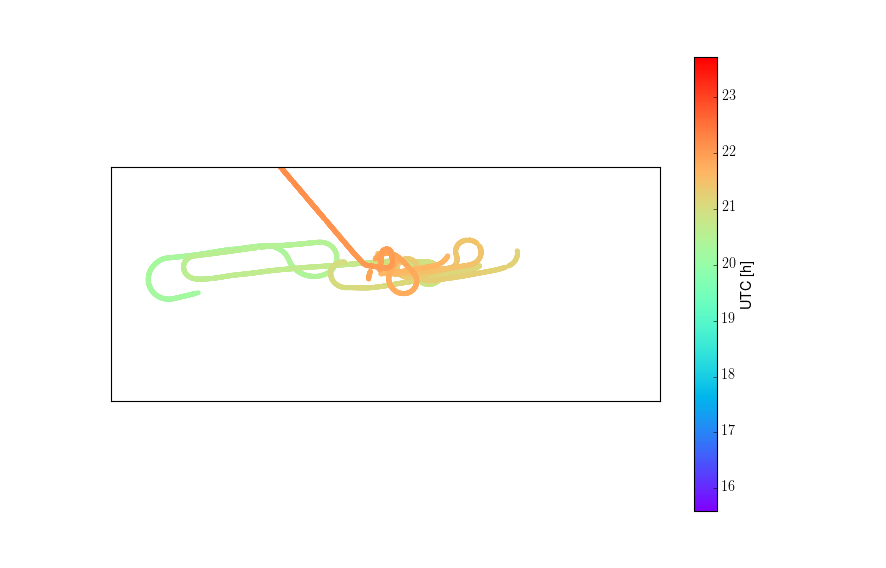

In [27]:
fig,ax = plt.subplots(1,1)
m = mi.build_basemap(lower_left=[-100,15],upper_right=[-85,32],ax=ax)
xt,yt = m(-95.3831,29.7628)
ax.text(xt,yt,'+')
ax.text(xt,yt,'Houston, TX',horizontalalignment='right',verticalalignment='top')
cs = m.scatter(istar_cld['Longitude'],istar_cld['Latitude'],marker='o',latlon=True,
               c=istar_cld['Start_UTC'],s=20,cmap=plt.cm.rainbow,edgecolor='none')
cb = plt.colorbar(cs)
cb.set_label('UTC [h]')

In [30]:
it = (istar_cld['Start_UTC']>19)&(istar_cld['Start_UTC']<22)

<IPython.core.display.Javascript object>


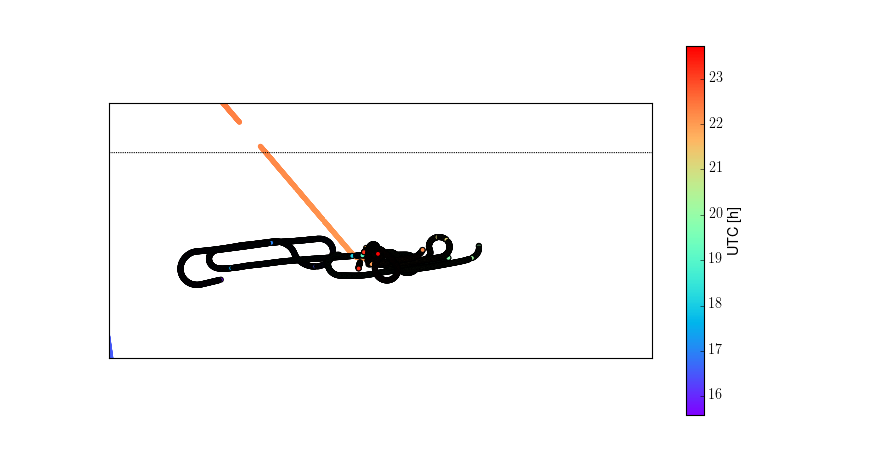

In [31]:
fig,ax = plt.subplots(1,1)
m = mi.build_basemap(lower_left=[-100,15],upper_right=[-85,32],ax=ax)
xt,yt = m(-95.3831,29.7628)
ax.text(xt,yt,'+')
ax.text(xt,yt,'Houston, TX',horizontalalignment='right',verticalalignment='top')
cs = m.scatter(istar_cld['Longitude'],istar_cld['Latitude'],marker='o',latlon=True,
               c=istar_cld['Start_UTC'],s=20,cmap=plt.cm.rainbow,edgecolor='none')
cb = plt.colorbar(cs)
cb.set_label('UTC [h]')
cs = m.scatter(istar_cld['Longitude'][it],istar_cld['Latitude'][it],marker='o',latlon=True,
               c=istar_cld['Start_UTC'][it],s=20,cmap=plt.cm.rainbow)

<IPython.core.display.Javascript object>


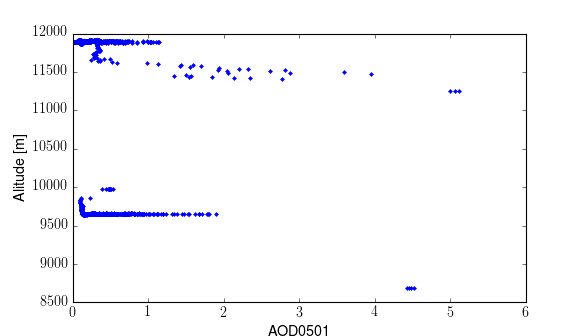

In [36]:
plt.figure()
ig = istar_cld['qual_flag'][it]==0
plt.plot(istar_cld['AOD0501'][it],istar_cld['GPS_alt'][it],'.')
plt.plot(istar_cld['AOD0501'][it][ig],istar_cld['GPS_alt'][it][ig],'xr')
plt.xlabel('AOD0501')
plt.ylabel('Alitude [m]')

<IPython.core.display.Javascript object>


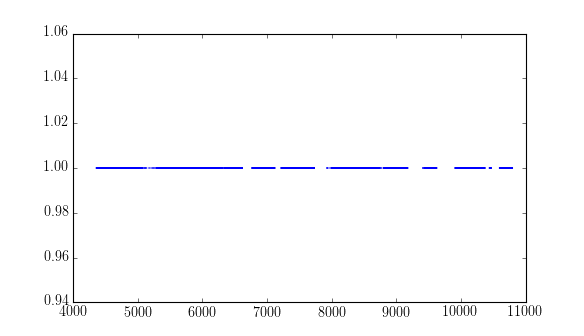

In [37]:
plt.figure()
plt.plot(istar_cld['qual_flag'][it])

## Check out the cld case #2

<IPython.core.display.Javascript object>


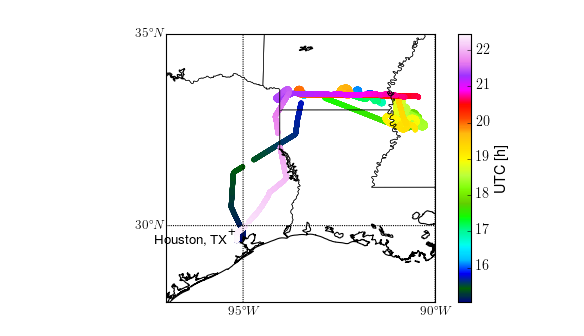

In [44]:
fig,ax = plt.subplots(1,1)
m = mi.build_basemap(lower_left=[-97,28],upper_right=[-90,35],ax=ax)
xt,yt = m(-95.3831,29.7628)
ax.text(xt,yt,'+')
ax.text(xt,yt,'Houston, TX',horizontalalignment='right',verticalalignment='top')
cs = m.scatter(istar_cld2['Longitude'],istar_cld2['Latitude'],marker='o',latlon=True,
               c=istar_cld2['Start_UTC'],s=20,cmap=plt.cm.gist_ncar,edgecolor='none')
cb = plt.colorbar(cs)
cb.set_label('UTC [h]')

In [323]:
itc = (istar_cld2['Start_UTC']>17.3)&(istar_cld2['Start_UTC']<20.3)
igc2 = istar_cld2['qual_flag'][itc]==0

<IPython.core.display.Javascript object>


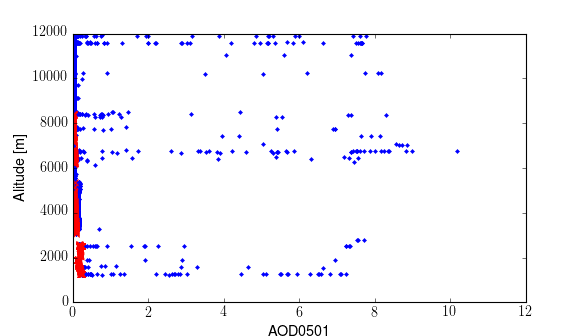

In [49]:
plt.figure()
igc2 = istar_cld2['qual_flag'][it]==0
plt.plot(istar_cld2['AOD0501'][it],istar_cld2['GPS_alt'][it],'.')
plt.plot(istar_cld2['AOD0501'][it][ig2],istar_cld2['GPS_alt'][it][ig2],'xr')
plt.xlabel('AOD0501')
plt.ylabel('Alitude [m]')

<IPython.core.display.Javascript object>


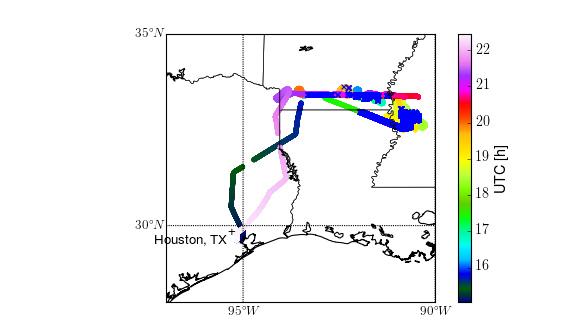

In [52]:
fig,ax = plt.subplots(1,1)
m = mi.build_basemap(lower_left=[-97,28],upper_right=[-90,35],ax=ax)
xt,yt = m(-95.3831,29.7628)
ax.text(xt,yt,'+')
ax.text(xt,yt,'Houston, TX',horizontalalignment='right',verticalalignment='top')
cs = m.scatter(istar_cld2['Longitude'],istar_cld2['Latitude'],marker='o',latlon=True,
               c=istar_cld2['Start_UTC'],s=20,cmap=plt.cm.gist_ncar,edgecolor='none')
m.scatter(istar_cld2['Longitude'][it][ig2],istar_cld2['Latitude'][it][ig2],marker='x',latlon=True,s=20)
cb = plt.colorbar(cs)
cb.set_label('UTC [h]')

<IPython.core.display.Javascript object>


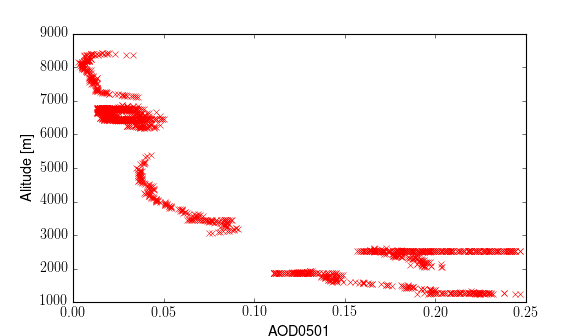

In [53]:
plt.figure()
ig2 = istar_cld2['qual_flag'][it]==0
plt.plot(istar_cld2['AOD0501'][it][ig2],istar_cld2['GPS_alt'][it][ig2],'xr')
plt.xlabel('AOD0501')
plt.ylabel('Alitude [m]')

In [54]:
alt = istar_cld2['GPS_alt'][it][ig2]
aod = istar_cld2['AOD0501'][it][ig2]

<IPython.core.display.Javascript object>


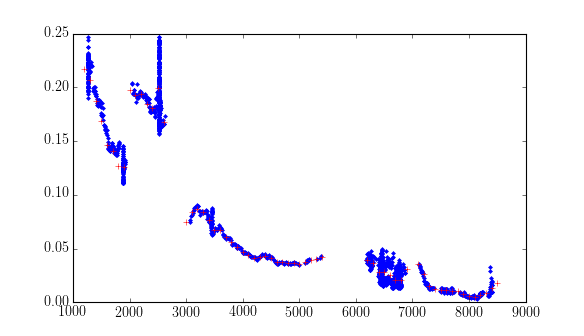

In [71]:
plt.figure()
plt.plot(alt,aod,'.')
plt.plot(bins,results,'+r')

In [314]:
from Sp_parameters import ext_prof,smooth

In [432]:
extc,binsc = ext_prof(istar_cld2['GPS_alt'][itc][igc2],istar_cld2['AOD0501'][itc][igc2],binsize=25,verbose=True)

range: [1210.0, 8460.0]
nbins: 291


<IPython.core.display.Javascript object>


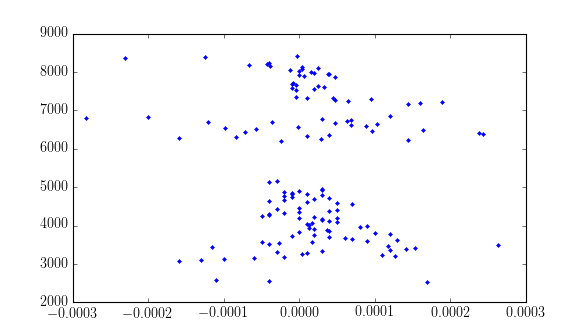

In [433]:
plt.figure()
plt.plot(extc,binsc,'.')

In [327]:
ll_cld2 = istar_cld2['Longitude'][itc][igc2][0],istar_cld2['Latitude'][itc][igc2][0]

In [522]:
profiles = {'Convective Cloud':{'point':ll_cld2,'ext':extc,'alt':binsc,'utc_rg':[17.3,20.3],'c':'blue','align':'right'}}

In [523]:
profiles['Convective Cloud']['ict_so2'] = iso2_cld2
profiles['Convective Cloud']['ict_ams'] = iams_cld2
profiles['Convective Cloud']['ict_star'] = istar_cld2

## Plot figure for the CA Valley case

<IPython.core.display.Javascript object>


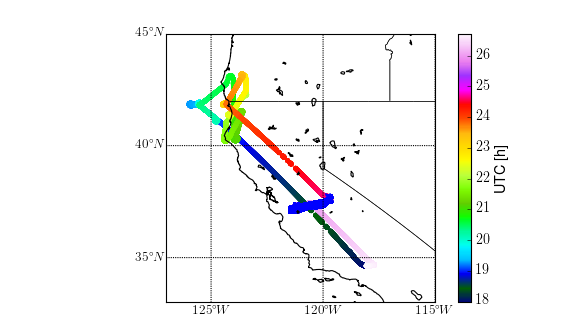

In [506]:
fig,ax = plt.subplots(1,1)
m = mi.build_basemap(lower_left=[-127,33],upper_right=[-115,45],ax=ax)
xt,yt = m(-95.3831,29.7628)
ax.text(xt,yt,'+')
ax.text(xt,yt,'Houston, TX',horizontalalignment='right',verticalalignment='top')
cs = m.scatter(istar_val['Longitude'],istar_val['Latitude'],marker='o',latlon=True,
               c=istar_val['Start_UTC'],s=20,cmap=plt.cm.gist_ncar,edgecolor='none')
m.scatter(istar_val['Longitude'][itv][igv],istar_val['Latitude'][itv][igv],marker='x',latlon=True,s=20)
cb = plt.colorbar(cs)
cb.set_label('UTC [h]')

In [505]:
itv = (istar_val['Start_UTC']>24.65)&(istar_val['Start_UTC']<25.9)
igv = istar_val['qual_flag'][itv]==0

In [510]:
ll_val = istar_val['Longitude'][itv][igv][0],istar_val['Latitude'][itv][igv][0]

In [525]:
profiles['San Joaquim Valley'] = {'point':ll_val,'ext':ext_val,'alt':bins_val,'utc_rg':[24.65,25.9],'c':'red','align':'left'}
profiles['San Joaquim Valley']['ict_so2'] = iso2_val
profiles['San Joaquim Valley']['ict_ams'] = iams_val
profiles['San Joaquim Valley']['ict_star'] = istar_val

<IPython.core.display.Javascript object>


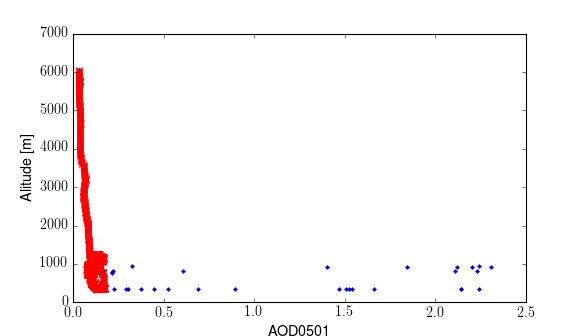

In [524]:
plt.figure()
plt.plot(istar_val['AOD0501'][itv],istar_val['GPS_alt'][itv],'.')
plt.plot(istar_val['AOD0501'][itv][igv],istar_val['GPS_alt'][itv][igv],'xr')
plt.xlabel('AOD0501')
plt.ylabel('Alitude [m]')

In [508]:
ext_val,bins_val = ext_prof(istar_val['GPS_alt'][itv][igv],istar_val['AOD0501'][itv][igv],binsize=25,verbose=True)

range: [290.0, 6100.0]
nbins: 233


<IPython.core.display.Javascript object>


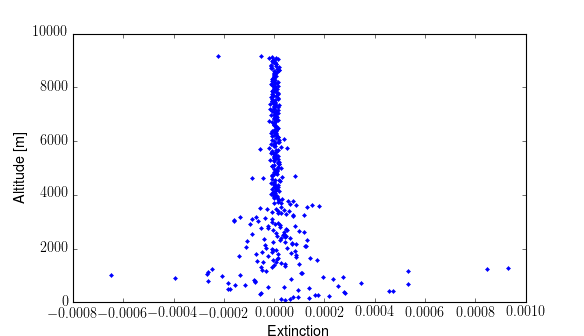

In [437]:
plt.figure()
plt.plot(ext_val,bins_val,'.')
plt.xlabel('Extinction')
plt.ylabel('Altitude [m]')

## Check out case of boundary layer #2

<IPython.core.display.Javascript object>


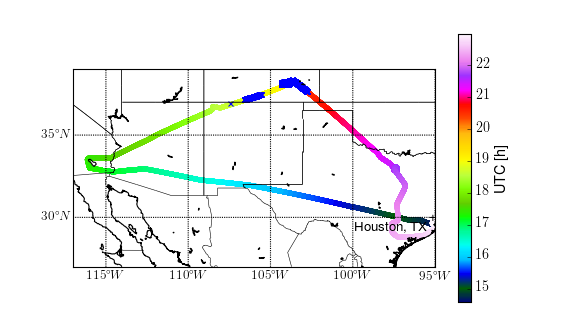

In [280]:
fig,ax = plt.subplots(1,1)
m = mi.build_basemap(lower_left=[-117,27],upper_right=[-95,39],ax=ax)
xt,yt = m(-95.3831,29.7628)
ax.text(xt,yt,'+')
ax.text(xt,yt,'Houston, TX',horizontalalignment='right',verticalalignment='top')
cs = m.scatter(istar_bnd['Longitude'],istar_bnd['Latitude'],marker='o',latlon=True,
               c=istar_bnd['Start_UTC'],s=20,cmap=plt.cm.gist_ncar,edgecolor='none')
m.scatter(istar_bnd['Longitude'][itb][igb],istar_bnd['Latitude'][itb][igb],marker='x',latlon=True,s=20)
cb = plt.colorbar(cs)
cb.set_label('UTC [h]')

In [253]:
itb = (istar_bnd['Start_UTC']>18.7)&(istar_bnd['Start_UTC']<20.5)

In [286]:
ll_bnd = istar_bnd['Longitude'][itb][igb][0],istar_bnd['Latitude'][itb][igb][0]

In [526]:
profiles['Plains'] = {'point':ll_bnd,'ext':ext_bnd,'alt':bins_bnd,'utc_rg':[18.7,20.5],'c':'green','align':'left'}
profiles['Plains']['ict_so2'] = iso2_bnd
profiles['Plains']['ict_ams'] = iams_bnd
profiles['Plains']['ict_star'] = istar_bnd

<IPython.core.display.Javascript object>


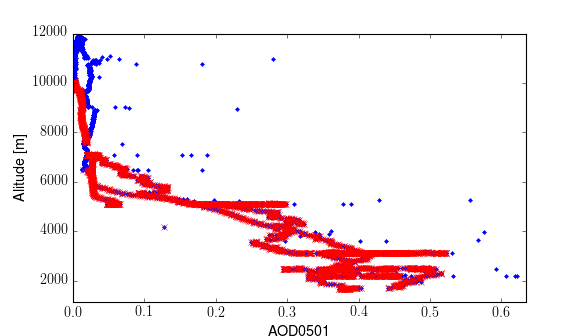

In [255]:
plt.figure()
igb = istar_bnd['qual_flag'][itb]==0
plt.plot(istar_bnd['AOD0501'][itb],istar_bnd['GPS_alt'][itb],'.')
plt.plot(istar_bnd['AOD0501'][itb][igb],istar_bnd['GPS_alt'][itb][igb],'xr')
plt.xlabel('AOD0501')
plt.ylabel('Alitude [m]')

In [439]:
ext_bnd,bins_bnd = ext_prof(istar_bnd['GPS_alt'][itb][igb],istar_bnd['AOD0501'][itb][igb],binsize=25,verbose=True)

range: [1610.0, 10140.0]
nbins: 342


<IPython.core.display.Javascript object>


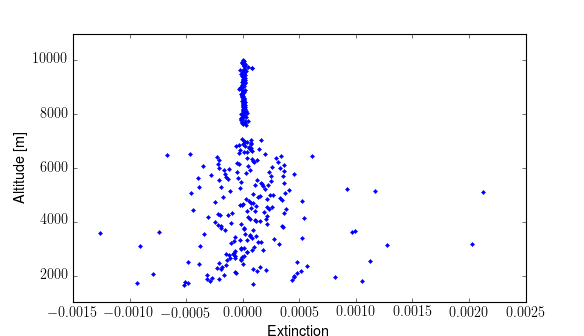

In [440]:
plt.figure()
plt.plot(ext_bnd,bins_bnd,'.')
plt.xlabel('Extinction')
plt.ylabel('Altitude [m]')

## Plot the boundary layer case from houston

In [294]:
ith = (istar_bnd['Start_UTC']>14.5)&(istar_bnd['Start_UTC']<15.0)

In [295]:
igh = istar_bnd['qual_flag'][ith]==0

In [296]:
ll_h = istar_bnd['Longitude'][ith][igh][0],istar_bnd['Latitude'][ith][igh][0]

In [527]:
profiles['Houston'] = {'point':ll_h,'ext':ext_h,'alt':bins_h,'utc_rg':[14.5,15.0],'c':'orange','align':'left'}
profiles['Houston']['ict_so2'] = iso2_bnd
profiles['Houston']['ict_ams'] = iams_bnd
profiles['Houston']['ict_star'] = istar_bnd

<IPython.core.display.Javascript object>


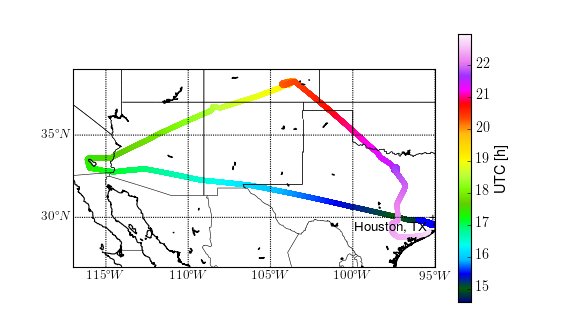

In [290]:
fig,ax = plt.subplots(1,1)
m = mi.build_basemap(lower_left=[-117,27],upper_right=[-95,39],ax=ax)
xt,yt = m(-95.3831,29.7628)
ax.text(xt,yt,'+')
ax.text(xt,yt,'Houston, TX',horizontalalignment='right',verticalalignment='top')
cs = m.scatter(istar_bnd['Longitude'],istar_bnd['Latitude'],marker='o',latlon=True,
               c=istar_bnd['Start_UTC'],s=20,cmap=plt.cm.gist_ncar,edgecolor='none')
m.scatter(istar_bnd['Longitude'][ith][igh],istar_bnd['Latitude'][ith][igh],marker='x',latlon=True,s=20)
cb = plt.colorbar(cs)
cb.set_label('UTC [h]')

<IPython.core.display.Javascript object>


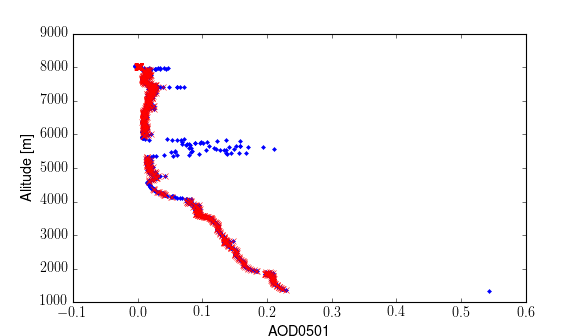

In [297]:
plt.figure()
plt.plot(istar_bnd['AOD0501'][ith],istar_bnd['GPS_alt'][ith],'.')
plt.plot(istar_bnd['AOD0501'][ith][igh],istar_bnd['GPS_alt'][ith][igh],'xr')
plt.xlabel('AOD0501')
plt.ylabel('Alitude [m]')

In [456]:
ext_h,bins_h = ext_prof(istar_bnd['GPS_alt'][ith][igh],istar_bnd['AOD0501'][ith][igh],binsize=25,verbose=True)

range: [1310.0, 8090.0]
nbins: 272


<IPython.core.display.Javascript object>


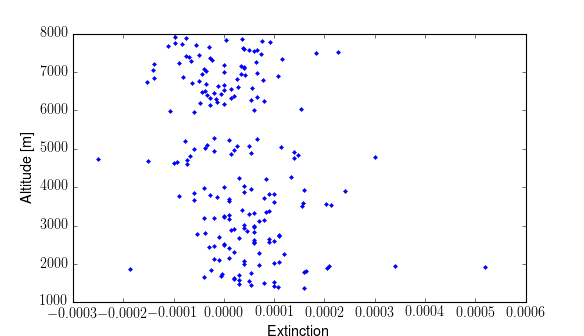

In [457]:
plt.figure()
plt.plot(ext_h,bins_h,'.')
plt.xlabel('Extinction')
plt.ylabel('Altitude [m]')

## Plots the case of clouds #3

<IPython.core.display.Javascript object>


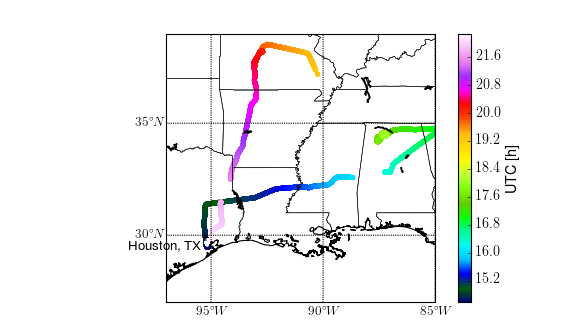

In [269]:
fig,ax = plt.subplots(1,1)
m = mi.build_basemap(lower_left=[-97,27],upper_right=[-85,39],ax=ax)
xt,yt = m(-95.3831,29.7628)
ax.text(xt,yt,'+')
ax.text(xt,yt,'Houston, TX',horizontalalignment='right',verticalalignment='top')
cs = m.scatter(istar_c3['Longitude'],istar_c3['Latitude'],marker='o',latlon=True,
               c=istar_c3['Start_UTC'],s=20,cmap=plt.cm.gist_ncar,edgecolor='none')
#m.scatter(istar_bnd['Longitude'][itb][igb],istar_bnd['Latitude'][itb][igb],marker='x',latlon=True,s=20)
cb = plt.colorbar(cs)
cb.set_label('UTC [h]')

In [275]:
itc3 = (istar_c3['Start_UTC']>16.5)&(istar_c3['Start_UTC']<18.8)
igc3 = istar_c3['qual_flag'][itc3]==0

<IPython.core.display.Javascript object>


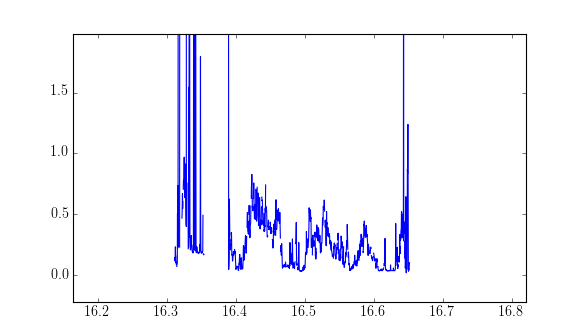

In [278]:
plt.figure()
plt.plot(istar_c3['Start_UTC'],istar_c3['AOD0501'])

<IPython.core.display.Javascript object>


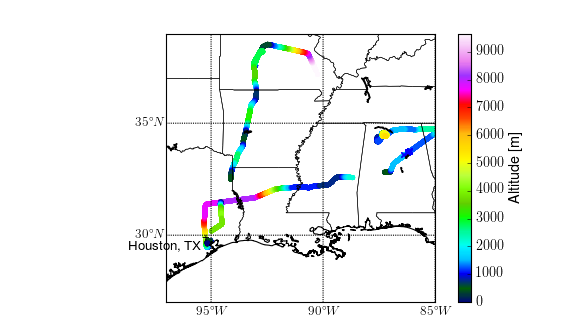

In [279]:
fig,ax = plt.subplots(1,1)
m = mi.build_basemap(lower_left=[-97,27],upper_right=[-85,39],ax=ax)
xt,yt = m(-95.3831,29.7628)
ax.text(xt,yt,'+')
ax.text(xt,yt,'Houston, TX',horizontalalignment='right',verticalalignment='top')
cs = m.scatter(istar_c3['Longitude'],istar_c3['Latitude'],marker='o',latlon=True,
               c=istar_c3['GPS_alt'],s=20,cmap=plt.cm.gist_ncar,edgecolor='none')
m.scatter(istar_c3['Longitude'][itc3][igc3],istar_c3['Latitude'][itc3][igc3],marker='x',latlon=True,s=20)
cb = plt.colorbar(cs)
cb.set_label('Altitude [m]')

# Compile the multiple profiles together

## Check the profiles

In [529]:
profiles.keys()

['Plains', 'San Joaquim Valley', 'Houston', 'Convective Cloud']

In [528]:
len(profiles)

4

## Compile the in situ

In [363]:
profiles['Houston']['ict_so2'].dtype.names

('UTC_start', 'UTC_stop', 'UTC_mid', 'SO2_GTCIMS', 'HCl_GTCIMS')

In [365]:
profiles['Houston']['ict_so2']['UTC_start']/(3600)

array([ 14.61469444,  14.615     ,  14.61533333, ...,  22.85236111,
        22.85269444,  22.85302778])

In [366]:
profiles['Houston']['ict_ams'].dtype.names

('AMS_Starttime',
 'AMS_Stoptime',
 'AMS_MidPointTime',
 'OA_lt_1um_AMS',
 'OA_lt_1um_AMS_prec',
 'OA_lt_1um_AMS_DL',
 'Sulfate_lt_1um_AMS',
 'Sulfate_lt_1um_AMS_prec',
 'Sulfate_lt_1um_AMS_DL',
 'Nitrate_lt_1um_AMS',
 'Nitrate_lt_1um_AMS_prec',
 'Nitrate_lt_1um_AMS_DL',
 'Ammonium_lt_1um_AMS',
 'Ammonium_lt_1um_AMS_prec',
 'Ammonium_lt_1um_AMS_DL',
 'Chloride_lt_1um_AMS',
 'Chloride_lt_1um_AMS_prec',
 'Chloride_lt_1um_AMS_DL',
 'StdtoVol_AMS',
 'PM1InletCorr_AMS',
 'IceFlag_AMS',
 'O_C_lt_1um_AMS',
 'H_C_lt_1um_AMS',
 'OM_OC_lt_1um_AMS',
 'f43_lt_1um_AMS',
 'f44_lt_1um_AMS',
 'f57_lt_1um_AMS',
 'f60_lt_1um_AMS',
 'AmmBalance_lt_1um_AMS',
 'OrgNitr_Fraction_lt_1um_AMS')

In [388]:
iso2_bndh

['37,1001\n',
 'Huey,Greg\n',
 'Georgia Tech\n',
 'Trace gas measurements made by chemical ionization mass spectrometer on DC-8\n',
 'SEAC4RS\n',
 '1,1\n',
 '2013,08,16,2014,10,02\n',
 '0\n',
 'UTC_start,seconds,UTC time given in seconds from midnight\n',
 '4\n',
 '1,1,1,1\n',
 '-9999,-9999,-9999,-9999\n',
 'UTC_stop,seconds,Stop UTC time given in seconds from midnight\n',
 'UTC_mid,seconds,Mid UTC time given in seconds from midnight\n',
 'SO2_GTCIMS,pptv,volume_mixing_ratio_of_sulfur_dioxide_in_air\n',
 'HCl_GTCIMS,pptv,volume_mixing_ratio_of_hydrogen_chloride_in_air\n',
 '1\n',
 'GENERATED_BY:ICARTT Header Maker v1.0 (http://www-adam.larc.nasa.gov/www/icartt_header/icartt_header.php)\n',
 '18\n',
 'PI_CONTACT_INFO:Greg Huey, greg.huey@eas.gatech.edu, 404-894-5541\n',
 'PLATFORM:DC-8 aircraft\n',
 'LOCATION:Aircarft location is given by the navigational file\n',
 'ASSOCIATED_DATA:N/A\n',
 'INSTRUMENT_INFO:Chemical Ionization Mass Spectrometer\n',
 'DATA_INFO:Measurements are reported 

In [368]:
len(istar_bnd['GPS_alt'])

30276

In [369]:
len(iams_bnd['AMS_Starttime'])

24881

In [372]:
len(iso2_bnd['UTC_start'])

25006

In [375]:
iams_bnd['AMS_Starttime']/3600.0

array([ 14.56737222,  14.56769167,  14.56799167, ...,  22.97503889,
        22.97531667,  22.97561944])

In [376]:
iso2_bnd['UTC_start']/3600.0

array([ 14.61469444,  14.615     ,  14.61533333, ...,  22.85236111,
        22.85269444,  22.85302778])

In [530]:
for e in profiles.keys():
    k = profiles[e]
    k['iso2'] = (k['ict_so2']['UTC_mid']>k['utc_rg'][0])&(k['ict_so2']['UTC_mid']<k['utc_rg'][1])
    k['so2'] = k['ict_so2']['SO2_GTCIMS'][k['iso2']]
    k['alt_so2'] = nearest_neighbor(k['ict_star']['Start_UTC'],k['ict_star']['GPS_alt'],k['ict_so2']['UTC_mid'],dist=0.01)[k['iso2']]
    k['iams'] = (k['ict_ams']['AMS_MidPointTime']/3600.0>k['utc_rg'][0])&(k['ict_ams']['AMS_MidPointTime']/3600.0<k['utc_rg'][1])
    k['ams'] = k['ict_ams']['Sulfate_lt_1um_AMS'][k['iams']]
    k['alt_ams'] = nearest_neighbor(k['ict_star']['Start_UTC'],k['ict_star']['GPS_alt'],k['ict_ams']['AMS_MidPointTime']/3600.0,dist=0.01)[k['iams']]

## Do the combined plot

In [519]:
profiles[k]['point']

(-92.535399999999996, 33.3994)

In [520]:
len(profiles)

5

In [407]:
smooth(profiles[k]['ams'],4)

TypeError: unhashable type: 'dict'

In [463]:
k['so2']

array([ 23.6,  30.2,  25.9, ...,   nan,   nan,   nan])

In [464]:
k['alt_so2']

array([ 2521.7,     nan,  2520.8, ...,  1266.3,     nan,  1267.2])

<IPython.core.display.Javascript object>


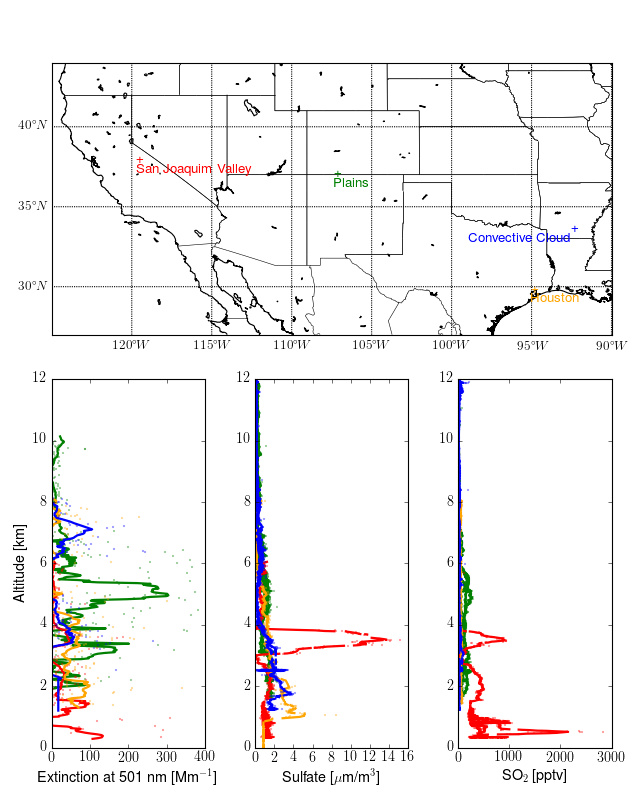

In [534]:
fig = plt.figure(figsize=(8,10))
axm = fig.add_subplot(2,1,1)
m = mi.build_basemap(lower_left=[-125,27],upper_right=[-90,44],ax=axm)
for k in profiles.keys():
    x,y = m(profiles[k]['point'][0],profiles[k]['point'][1])
    axm.text(x,y,'+',color=profiles[k]['c'])
    axm.text(x,y,k,horizontalalignment=profiles[k]['align'],verticalalignment='top',color=profiles[k]['c'])

ax1 = fig.add_subplot(2,3,4)
for k in profiles.keys():
    ax1.plot(profiles[k]['ext']*1000000.0,profiles[k]['alt']/1000.0,'o',c=profiles[k]['c'],alpha=0.4,markeredgecolor='None',markersize=2)
    ax1.plot(smooth(profiles[k]['ext']*1000000.0,22),profiles[k]['alt']/1000.0,'-',c=profiles[k]['c'],lw=2)
ax1.set_ylabel('Altitude [km]')
ax1.set_xlabel('Extinction at 501 nm [Mm$^{-1}$]')
#ax1.set_title('4STAR')
ax1.set_xlim([0,400])
ax1.set_xticks([0,100,200,300,400])
ax1.set_ylim([0,12])
ax2 = fig.add_subplot(2,3,5,sharey=ax1)
for k in profiles.keys():
    ax2.plot(profiles[k]['ams'],profiles[k]['alt_ams']/1000.0,'o',c=profiles[k]['c'],alpha=0.4,markeredgecolor='None',markersize=2)
    ax2.plot(smooth(profiles[k]['ams'],10),profiles[k]['alt_ams']/1000.0,'-',c=profiles[k]['c'],lw=2)
ax2.set_xlabel('Sulfate [$\\mu$m/m$^3$]')
#ax2.yaxis.set_ticklabels([])
ax2.set_xlim([0,16])

#ax2.set_title('Sulfate AMS')

ax3 = fig.add_subplot(2,3,6,sharey=ax1)
for k in profiles.keys():
    ax3.plot(profiles[k]['so2'],profiles[k]['alt_so2']/1000.0,'o',c=profiles[k]['c'],alpha=0.4,markeredgecolor='None',markersize=2)
    ax3.plot(smooth(profiles[k]['so2'],10),profiles[k]['alt_so2']/1000.0,'-',c=profiles[k]['c'],lw=2)
ax3.set_xlabel('SO$_2$ [pptv]')
#ax3.yaxis.set_ticklabels([])
ax3.set_xlim(0,3000)
ax3.set_xticks([0,1000,2000,3000])
ax3.set_ylim([0,12])
#ax3.set_title('Sulfur Dioxide particles from GTCIMS')
plt.tight_layout()
fig.savefig(fp+'plots/SEAC4RS_profile_comparison.png',transparent=True,dpi=600)

# save the profile dict

In [532]:
sio.savemat(fp+'profiles.mat',profiles)